In [1]:
# load importent librarys
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import warnings
warnings.filterwarnings("ignore")

2024-05-11 16:32:03.783238: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 16:32:03.787471: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 16:32:03.848392: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 16:32:04.865495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Workflow Diagram

                                                Workflow of Diabetes Prediction using DL
                                                ----------------------------------------                                               
                                                
                                                +-------------------------------------+
                                                |  Data Acquisition and Preprocessing |
                                                +-----------------+-------------------+
                                                                  |
                                                                  v
                                                +-----------------+-------------------+
                                                |          Model Development          |
                                                +-----------------+-------------------+
                                                                  |
                                                                  v
                                                +-----------------+-------------------+
                                                |          Model Evaluation           |
                                                +-----------------+-------------------+
                                                                  |
                                                                  v
                                                +-----------------+-------------------+
                                                |   Model Deployment and Monitoring  |
                                                +-----------------+-------------------+
                                                                  |
                                                                  v
                                                +-----------------+-------------------+
                                                |    Documentation and Reporting     |
                                                +-------------------------------------+


# Data Acquisition and Preprocessing 

In [2]:
#step1: load the dataset
train = pd.read_csv("dataset/diabetes.csv")

In [3]:
train.shape

(768, 9)

In [4]:
train.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
584,8,124,76,24,600,28.7,0.687,52,1
558,11,103,68,40,0,46.2,0.126,42,0
411,1,112,72,30,176,34.4,0.528,25,0
302,5,77,82,41,42,35.8,0.156,35,0
295,6,151,62,31,120,35.5,0.692,28,0
712,10,129,62,36,0,41.2,0.441,38,1
760,2,88,58,26,16,28.4,0.766,22,0
113,4,76,62,0,0,34.0,0.391,25,0
572,3,111,58,31,44,29.5,0.430,22,0
583,8,100,76,0,0,38.7,0.190,42,0


In [5]:
#check isnull value
train.isnull().any().sum()
# no null value in the dataset

0

In [6]:
# Data Exploration
print("shape of data:",train.shape)
print("columns of data",train.columns)
print("Data types of data",train.dtypes)
print("Describe the data",train.describe())

shape of data: (768, 9)
columns of data Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Data types of data Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Describe the data        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.00000

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Splitting the dataset into features and target variable
features = train.drop("Outcome", axis=1)
target = train['Outcome']
features.shape

(768, 8)

In [9]:
target.shape

(768,)

### Normalizing the features

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [12]:
features_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
features_scaled.shape

(768, 8)

### train_test_split 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled, target, test_size = 0.20, random_state=42)

In [15]:
# Print shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


# Model Development 

1D CNN model are use in the dataset

In [16]:
# load libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Design Model Architecture:

- Dsign a 1D CNN architecture suitable for the diabetes classification task.
- termine the number of convolutional layers, filters, kernel sizes, and activation functions based on the complexity of the dataset and the problem at hand.
- Decide on the architecture considering factors like model capacity, overfitting, and computational resources.


In [17]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = "relu"),
    Dropout(0.5),
    Dense(64, activation = "relu"),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')

])

## Compile the Model
- Compile the model using TensorFlow or Keras.
- Choose an appropriate optimizer (e.g., Adam), loss function (e.g., binary cross-entropy for binary classification), and evaluation metrics (e.g., accuracy).
- Compile the model to prepare it for training.


In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Train the Model

- Train the compiled model on the training dataset.
- Monitor training metrics such as loss and accuracy to assess model convergence and performance.
- Optionally, use techniques like early stopping to prevent overfitting and save the best model weights.


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6682 - loss: 0.6566 - val_accuracy: 0.6423 - val_loss: 0.6173
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.5864 - val_accuracy: 0.6992 - val_loss: 0.5625
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7074 - loss: 0.5503 - val_accuracy: 0.7236 - val_loss: 0.5113
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7278 - loss: 0.5115 - val_accuracy: 0.7236 - val_loss: 0.4882
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.5197 - val_accuracy: 0.7398 - val_loss: 0.4796
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7407 - loss: 0.5135 - val_accuracy: 0.7480 - val_loss: 0.4748
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7469 - loss: 0.5240 - val_accuracy: 0.7480 - val_loss: 0.4716
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 0.5141 - val_accuracy: 0.7317 - 

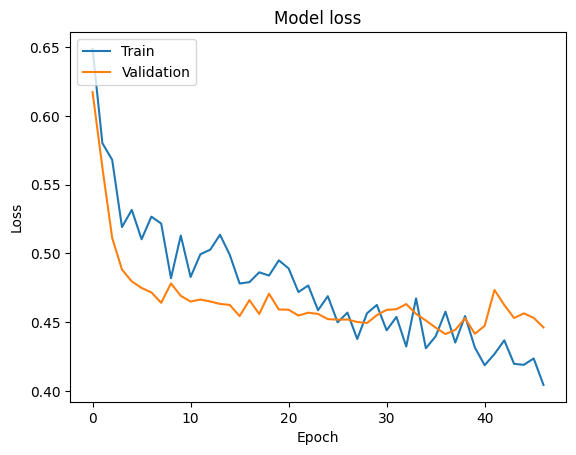

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 0.5567 
Test Loss: 0.5469683408737183
Test Accuracy: 0.7597402334213257
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


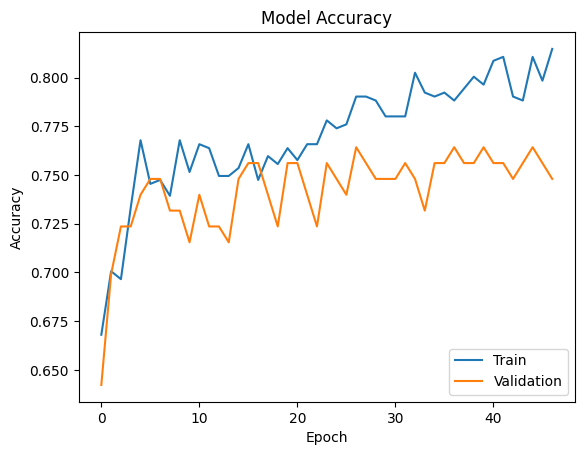

In [20]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Get the predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Plot training & validation loss values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 0.5567 
Test Loss: 0.5469683408737183
Test Accuracy: 0.7597402334213257
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[78 21]
 [16 39]]


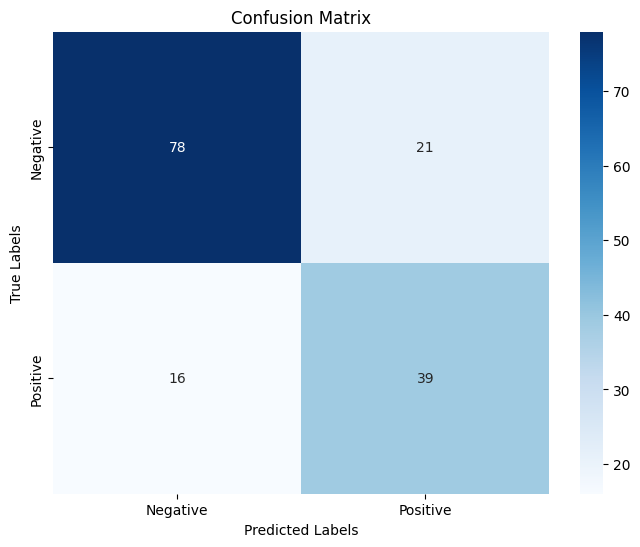

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Get the predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)


In [32]:
import h5py

# Save the trained model
model.save("diabetes_detection_model.keras")



In [39]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("diabetes_detection_model.keras")

# Function to preprocess user input
def preprocess_input(user_input):
    return np.array(user_input).reshape(1, 8, 1)

# Get user input for each feature
pregnancies = float(input("Enter the number of pregnancies: "))
glucose = float(input("Enter the glucose level: "))
blood_pressure = float(input("Enter the blood pressure: "))
skin_thickness = float(input("Enter the skin thickness: "))
insulin = float(input("Enter the insulin level: "))
bmi = float(input("Enter the BMI: "))
diabetes_pedigree_function = float(input("Enter the diabetes pedigree function: "))
age = float(input("Enter the age: "))

# Preprocess user input
user_input = preprocess_input([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age])

# Make prediction
prediction = loaded_model.predict(user_input)

# Convert prediction to human-readable format
prediction_label = "Diabetes" if prediction > 0.5 else "No Diabetes"

# Print prediction
print("Prediction:", prediction_label)


Enter the number of pregnancies:  9
Enter the glucose level:  165
Enter the blood pressure:  88
Enter the skin thickness:  0
Enter the insulin level:  0
Enter the BMI:  30.4
Enter the diabetes pedigree function:  0.302
Enter the age:  49


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: Diabetes


In [36]:
train.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
379,0,93,100,39,72,43.4,1.021,35,0
624,2,108,64,0,0,30.8,0.158,21,0
498,7,195,70,33,145,25.1,0.163,55,1
464,10,115,98,0,0,24.0,1.022,34,0
355,9,165,88,0,0,30.4,0.302,49,1
